In [2]:
# imports
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_US_DS = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

df_US_DS = df_US_DS.dropna(subset='salary_year_avg')
df_US_DS = df_US_DS.explode('job_skills')

In [22]:
df_US_DS[['salary_year_avg', 'job_skills']]
df_US_DS_group = df_US_DS.groupby('job_skills')['salary_year_avg'].agg(['count','median',])
df_US_DS_top_pay = df_US_DS_group.sort_values(by='median', ascending=False).head(10)
df_US_DS_skills = df_US_DS_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)


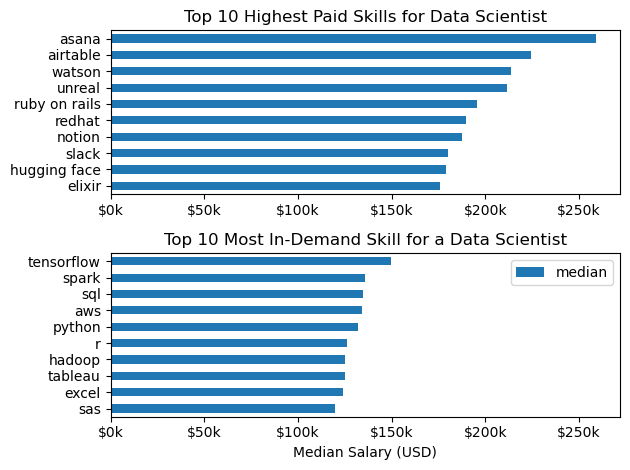

In [33]:
fig, ax = plt.subplots(2,1)

df_US_DS_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title("Top 10 Highest Paid Skills for Data Scientist")
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

df_US_DS_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_title("Top 10 Most In-Demand Skill for a Data Scientist")
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

fig.tight_layout()